## Lab Exercise 1 - Sampling and Reconstruction of Speech Signals

### Q1- Implement sampling and quantization techniques for the given speech signals.

#### (a) Plot the time domain representation of the original speech signal.

In [1]:
import librosa
amplitude,sample_rate = librosa.load('output.mp3',sr=None)

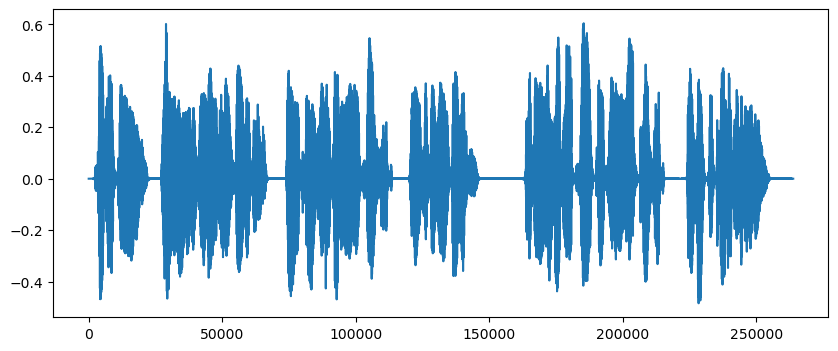

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(amplitude)
plt.show()

#### (b) Sample the speech signal at different sampling rates (e.g., 8kHz, 16kHz, and 44.1kHz).

In [3]:
print("Current Sample Rate:",sample_rate)

Current Sample Rate: 24000


In [4]:
resample1=librosa.resample(amplitude,orig_sr=sample_rate,target_sr=8000)
resample2=librosa.resample(amplitude,orig_sr=sample_rate,target_sr=16000)
resample3=librosa.resample(amplitude,orig_sr=sample_rate,target_sr=44100)

#### (c) Plot sampled speech signal for each of these sampling rates.

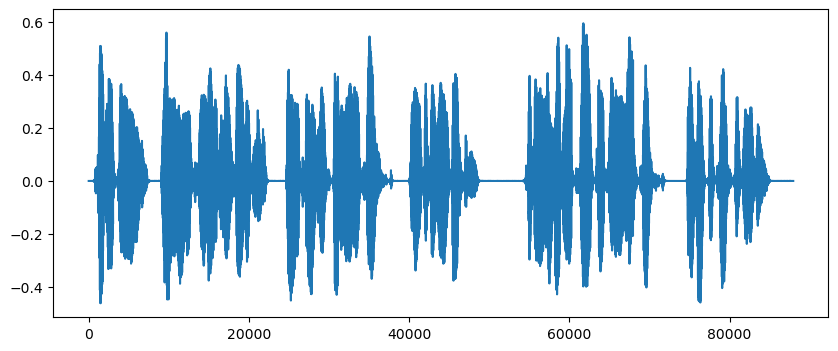

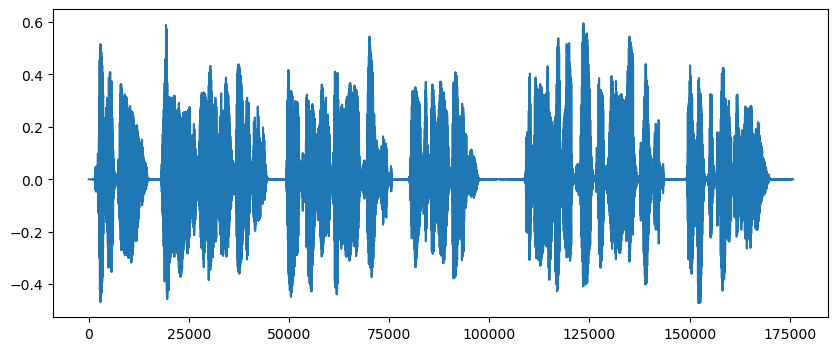

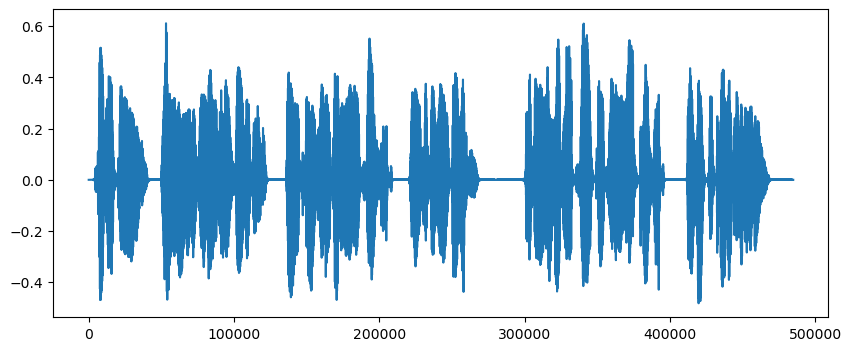

In [5]:
plt.figure(figsize=(10,4))
plt.plot(resample1)
plt.show()
plt.figure(figsize=(10,4))
plt.plot(resample2)
plt.show()
plt.figure(figsize=(10,4))
plt.plot(resample3)
plt.show()

#### (d) Using the sampled signals from the above task, reconstruct the signal using:
#### (i) Zero-order hold (nearest-neighbor interpolation)
#### (ii) Linear interpolation.

In [6]:
from scipy import interpolate
import numpy as np
interpolation1=interpolate.interp1d([x for x in range(len(resample1))],resample1,kind='zero')
interpolation2=interpolate.interp1d([x for x in range(len(resample1))],resample1,kind='linear')
interpolation3=interpolate.interp1d([x for x in range(len(resample2))],resample2,kind='zero')
interpolation4=interpolate.interp1d([x for x in range(len(resample2))],resample2,kind='linear')
new=np.linspace(0,len(resample1)-1,len(amplitude))
upsample8a=interpolation1(new)
upsample8b=interpolation2(new)
upsample16a=interpolation3(new)
upsample16b=interpolation4(new)

#### (e) Calculate the Mean Squared Error (MSE) between the original and the reconstructed signals for both methods.

In [7]:
from sklearn.metrics import mean_squared_error
print("Mean square error post reconstructing 8KHz using zero-hold interpolation: ",mean_squared_error(amplitude,upsample8a))
print("Mean square error post reconstructing 8KHz using Linear interpolation: ",mean_squared_error(amplitude,upsample8b))
print("Mean square error post reconstructing 16KHz using zero-hold interpolation: ",mean_squared_error(amplitude,upsample16a))
print("Mean square error post reconstructing 16KHz using Linear interpolation: ",mean_squared_error(amplitude,upsample16b))

Mean square error post reconstructing 8KHz using zero-hold interpolation:  0.0020908182307869216
Mean square error post reconstructing 8KHz using Linear interpolation:  0.0007810589936483113
Mean square error post reconstructing 16KHz using zero-hold interpolation:  0.020069882169254927
Mean square error post reconstructing 16KHz using Linear interpolation:  0.019816325444158348


#### We can see that upon reconstructing 8KHz the error is the least but theoritically this shouldn't be the case.

### Q2- Implement the source-filter Model for a given speech signal and analyze the impact of sampling and reconstruction on the quality of the speech signal.

#### (a) Generate a synthetic speech signal using the source-filter model.
#### (i) Create a source signal (e.g., a glottal pulse train for voiced sounds or white noise for unvoiced sounds).
#### (ii) Apply a filter that models the vocal tract, represented by an all-pole filter or an FIR filter with formants (resonances of the vocal tract).

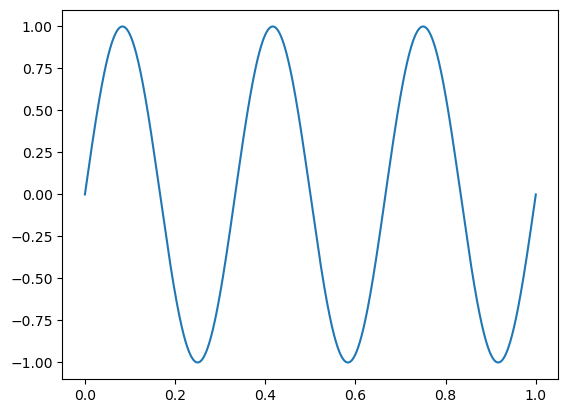

In [8]:
time=np.linspace(0,1,1000)
frequency=3
continuous_signal=np.sin(2*np.pi*frequency*time)
plt.plot(time,continuous_signal)

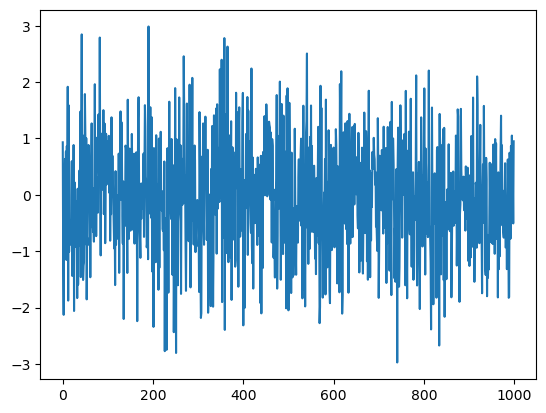

In [9]:
noise_signal=np.random.randn(1000)
plt.plot(noise_signal)

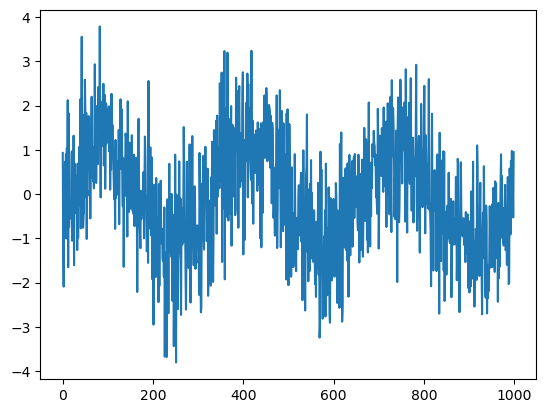

In [10]:
signal=continuous_signal+noise_signal
plt.plot(signal)

In [11]:
from scipy.signal import firwin, lfilter
numtaps=101  
formant_frequencies=[500, 1500, 2500]  
normalized_freqs=[f/(240000/2) for f in formant_frequencies] 
vocal_tract_filter=firwin(numtaps,normalized_freqs,pass_zero=False)

#### (b) Plot the generated speech signal and analyze the effect of the filter on the original source.

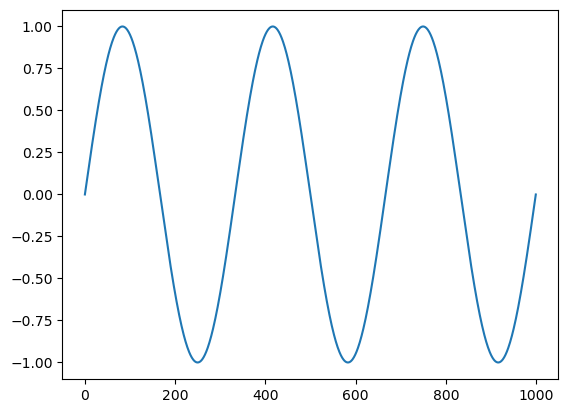

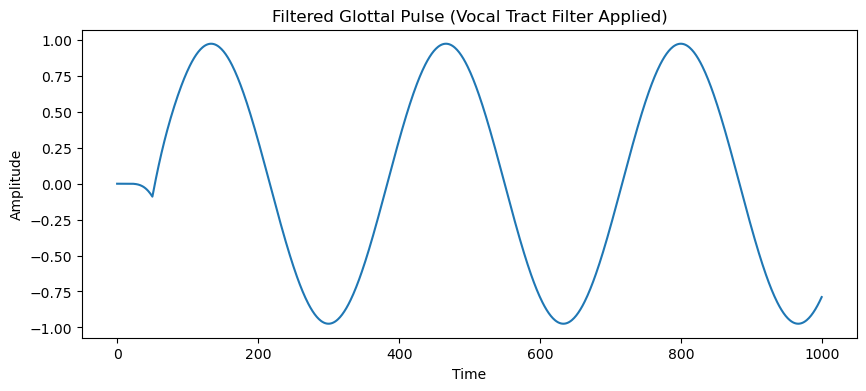

In [12]:
plt.plot(continuous_signal)
filtered_glottal_pulse = lfilter(vocal_tract_filter, 1.0, continuous_signal)
plt.figure(figsize=(10, 4))
plt.plot(filtered_glottal_pulse[:1000])
plt.title('Filtered Glottal Pulse (Vocal Tract Filter Applied)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### (c) Sample the speech signal generated in the above task at different sampling rates (e.g., 8 kHz, 16 kHz, 44.1 kHz).

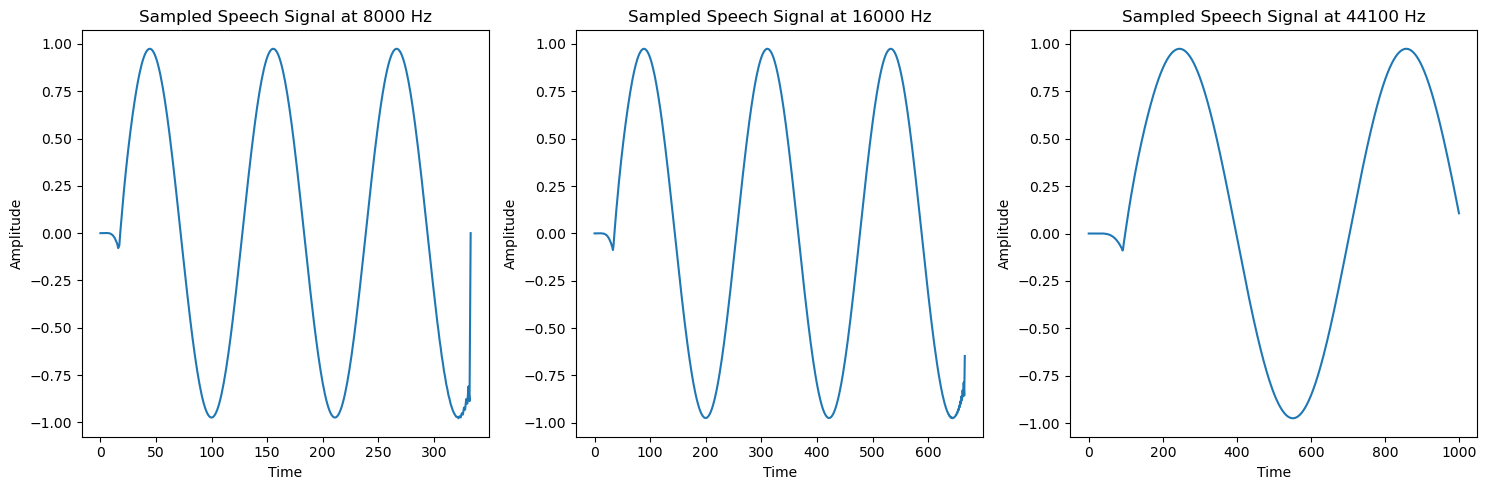

In [16]:
resampled_signals = [librosa.resample(filtered_glottal_pulse, orig_sr=24000, target_sr=rate) for rate in [8000,16000,44100]]
f = plt.figure(figsize=(15,5))
for i, signal in enumerate(resampled_signals):
    f.add_subplot(1,3,i+1)
    plt.plot(signal[:1000]) 
    plt.title(f'Sampled Speech Signal at {[8000,16000,44100][i]} Hz')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.tight_layout()

#### (d) Reconstruct the signal using a suitable interpolation method (e.g., zero-order hold, linear interpolation).
#### (e) Compute the Mean Squared Error (MSE) between the original and reconstructed speech signals.

In [17]:
from scipy import interpolate
for i in resampled_signals:
    x = np.arange(len(i))
    f_zero_order = interpolate.interp1d(x, i, kind='nearest')
    f_linear = interpolate.interp1d(x, i, kind='linear')
    x_new = np.linspace(0, len(i)-1, len(filtered_glottal_pulse))
    reconstructed_zero_order = f_zero_order(x_new)
    reconstructed_linear = f_linear(x_new)
    mse_zero_order = mean_squared_error(filtered_glottal_pulse[:len(reconstructed_zero_order)], reconstructed_zero_order)
    mse_linear = mean_squared_error(filtered_glottal_pulse[:len(reconstructed_linear)], reconstructed_linear)
    print(f'MSE for Zero-Order Hold: {mse_zero_order}')
    print(f'MSE for Linear Interpolation: {mse_linear}')
    print("------------------------------------------")

MSE for Zero-Order Hold: 0.0013920738616849623
MSE for Linear Interpolation: 0.0009335894831934078
------------------------------------------
MSE for Zero-Order Hold: 5.646650844381681e-05
MSE for Linear Interpolation: 2.312736679566969e-05
------------------------------------------
MSE for Zero-Order Hold: 0.0006675673677336394
MSE for Linear Interpolation: 0.0006539969976940481
------------------------------------------


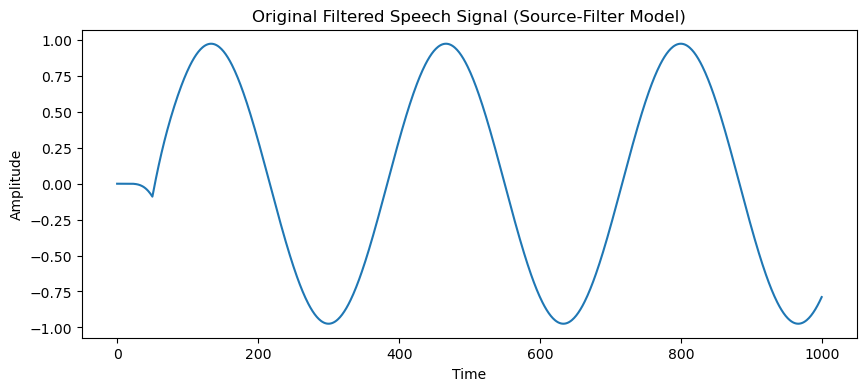

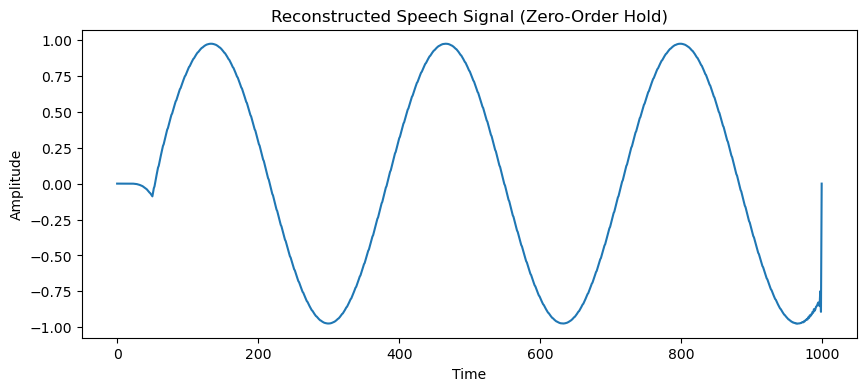

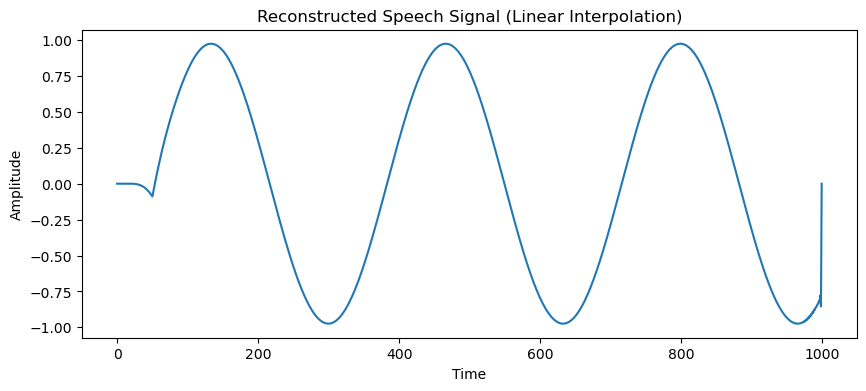

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(filtered_glottal_pulse[:1000])
plt.title('Original Filtered Speech Signal (Source-Filter Model)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(reconstructed_zero_order[:1000])  
plt.title('Reconstructed Speech Signal (Zero-Order Hold)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(reconstructed_linear[:1000]) 
plt.title('Reconstructed Speech Signal (Linear Interpolation)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### We can see that upon reconstructing 16KHz the error is the least but theoritically this shouldn't be the case.

## END